# Lab on Machine Learning Pipeline

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.

## Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/madmo-basic/madmo-basic-21-11/homeworks/assignment04_ml_pipeline_lab/car_data.csv

--2021-12-18 22:32:49--  https://raw.githubusercontent.com/girafe-ai/madmo-basic/madmo-basic-21-11/homeworks/assignment04_ml_pipeline_lab/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.006s  

2021-12-18 22:32:49 (9.10 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,524,105,52,107,207,60,11,218,31,24,167,221,701,197,66,0,20,191,203
1,226,107,54,98,210,66,11,218,31,24,169,221,704,216,71,14,0,188,197
2,625,104,53,101,190,63,10,213,32,24,166,218,664,202,74,13,21,188,198
3,789,90,39,85,160,59,7,163,41,20,131,189,396,158,71,7,13,186,192
4,652,97,37,78,181,62,8,161,41,20,131,182,389,117,62,2,28,203,211
5,128,97,45,88,173,67,10,157,43,20,157,173,365,157,67,8,12,192,200
6,658,91,39,77,153,59,8,139,48,18,139,159,289,123,62,8,17,201,209
7,353,81,47,69,146,64,6,151,44,19,147,171,340,195,75,5,0,183,188
8,744,96,46,88,174,68,10,155,43,19,148,173,354,182,69,14,15,194,202
9,636,96,41,69,153,56,7,141,47,18,141,162,297,169,61,11,8,202,209


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,420.894353,93.395264,44.735883,81.693989,167.945355,61.897996,8.537341,167.581056,41.207650,20.482696,147.741348,187.542805,433.142077,174.276867,72.706740,6.457195,12.588342,188.743169,195.371585
std,244.954554,8.018822,6.010438,15.641548,33.387581,8.167977,4.778389,32.733597,7.720048,2.543449,14.182676,31.165974,173.692482,31.723714,7.803212,4.797780,8.865475,6.029851,7.401445
min,2.000000,77.000000,33.000000,40.000000,109.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,207.000000,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,34.000000,19.000000,137.000000,167.000000,317.000000,150.000000,68.000000,3.000000,6.000000,184.000000,190.000000
50%,423.000000,93.000000,44.000000,79.000000,165.000000,62.000000,8.000000,155.000000,43.000000,19.000000,145.000000,176.000000,357.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,636.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,195.000000,46.000000,22.000000,159.000000,216.000000,574.000000,197.000000,76.000000,9.000000,19.000000,192.000000,201.000000
max,842.000000,117.000000,58.000000,112.000000,333.000000,138.000000,52.000000,262.000000,61.000000,28.000000,182.000000,320.000000,987.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std.shape, X_test_std.shape

((549, 19), (297, 19))

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

Fitting 5 folds for each of 100 candidates, totalling 500 fits
f1: 0.8030839122824834, accuracy: 0.7912457912457912


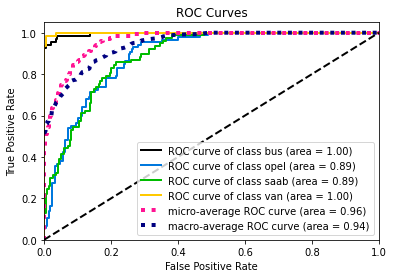

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import scikitplot

sc = StandardScaler()
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
pipe = Pipeline(steps=[('sc', sc), ('lr', lr)])
param_grid_lr = {
    'lr__penalty' : ['l1', 'l2'],
    'lr__C' : np.linspace(0.1, 10, num=50)
}
grid_lr = GridSearchCV(pipe, param_grid_lr, cv=5, verbose=1, n_jobs=-1)
grid_lr.fit(X_train, y_train)
model_lr = grid_lr.best_estimator_
y_pred = model_lr.predict(X_test)
y_pred_proba = model_lr.predict_proba(X_test)
print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
scikitplot.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

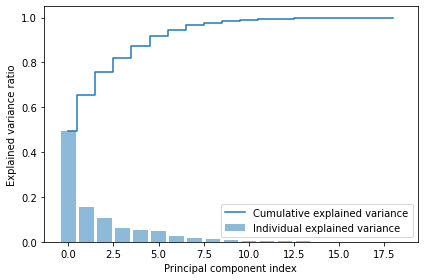

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

I selected 13 componets because as you see on the plot it's enough for good explained variance ratio. I normalized the data

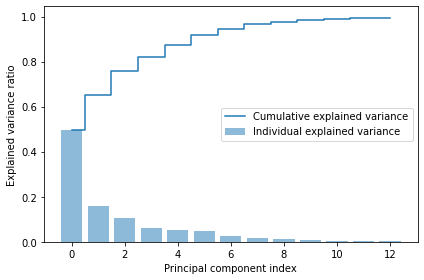

In [10]:
pca = PCA(n_components=13)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


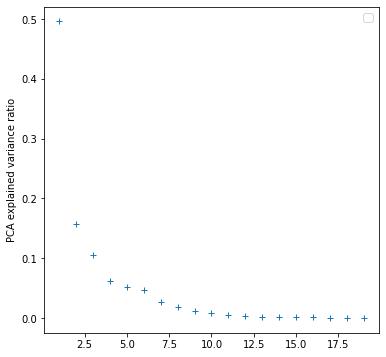

In [11]:
# Plot the PCA spectrum
pca = PCA()
pca.fit(X_train_std)
fig, ax0 = plt.subplots(nrows=1, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")
ax0.legend(prop=dict(size=12))

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
f1: 0.8060930796716101, accuracy: 0.7946127946127947


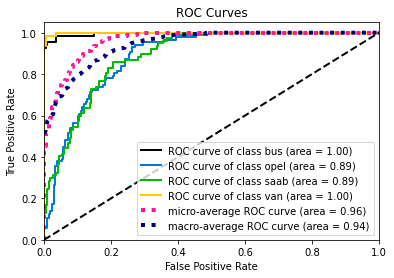

In [12]:
sc = StandardScaler()
pca = PCA()
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
pipe = Pipeline(steps=[('sc', sc), ('pca', pca), ('lr', lr)])
param_grid_lr = {
    'pca__n_components' : [2, 5, 13, 15, 19],
    'lr__penalty' : ['l1', 'l2'],
    'lr__C' : np.linspace(0.1, 10, num=50)
}
grid_lr = GridSearchCV(pipe, param_grid_lr, cv=5, verbose=1, n_jobs=-1)
grid_lr.fit(X_train, y_train)
model_lr = grid_lr.best_estimator_
y_pred = model_lr.predict(X_test)
y_pred_proba = model_lr.predict_proba(X_test)
print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
scikitplot.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Fitting 5 folds for each of 50 candidates, totalling 250 fits
f1: 0.6538118094864972, accuracy: 0.6363636363636364


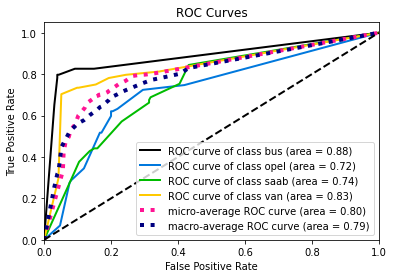

In [13]:
from sklearn.tree import DecisionTreeClassifier

sc = StandardScaler()
pca = PCA()
dtc = DecisionTreeClassifier()
pipe = Pipeline(steps=[('sc', sc), ('pca', pca), ('dtc', dtc)])
param_grid_dtc = {
    'pca__n_components' : [2, 5, 13, 15, 19],
    'dtc__max_depth' : np.linspace(1, 10, num=10)
}
grid_dtc = GridSearchCV(pipe, param_grid_dtc, cv=5, verbose=1, n_jobs=-1)
grid_dtc.fit(X_train, y_train)
model_dtc = grid_dtc.best_estimator_
y_pred = model_dtc.predict(X_test)
y_pred_proba = model_dtc.predict_proba(X_test)
print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
scikitplot.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [14]:
from sklearn.ensemble import BaggingClassifier

bag_lr_f1 = []
bag_lr_acc = []
for n_estimators in np.arange(2,100,5):
    bag_lr = BaggingClassifier(
        base_estimator=model_lr, n_estimators=n_estimators, n_jobs=-1, bootstrap=True
    )
    bag_lr = bag_lr.fit(X_train, y_train)
    y_pred = bag_lr.predict(X_test)
    y_pred_proba = bag_lr.predict_proba(X_test)
    print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
    bag_lr_f1.append(f1_score(y_test, y_pred, average="macro"))
    bag_lr_acc.append(accuracy_score(y_test, y_pred))
print(f'mean f1: {np.mean(bag_lr_f1)}, mean accuracy: {np.mean(bag_lr_acc)}')

f1: 0.7926942392237825, accuracy: 0.7777777777777778
f1: 0.7817399379554921, accuracy: 0.7676767676767676
f1: 0.7837785175704507, accuracy: 0.7710437710437711
f1: 0.8093159539070854, accuracy: 0.797979797979798
f1: 0.7970287864309603, accuracy: 0.7845117845117845
f1: 0.802266147830664, accuracy: 0.7912457912457912
f1: 0.795480699912967, accuracy: 0.7845117845117845
f1: 0.8000627138991919, accuracy: 0.7878787878787878
f1: 0.7931916154691302, accuracy: 0.7811447811447811
f1: 0.802855477855478, accuracy: 0.7912457912457912
f1: 0.7997091930523118, accuracy: 0.7878787878787878
f1: 0.8062937877403287, accuracy: 0.7946127946127947
f1: 0.793626091944408, accuracy: 0.7811447811447811
f1: 0.7970287864309603, accuracy: 0.7845117845117845
f1: 0.7968518706578814, accuracy: 0.7845117845117845
f1: 0.7907981963688486, accuracy: 0.7777777777777778
f1: 0.7966200466200466, accuracy: 0.7845117845117845
f1: 0.793626091944408, accuracy: 0.7811447811447811
f1: 0.8000627138991919, accuracy: 0.7878787878787878

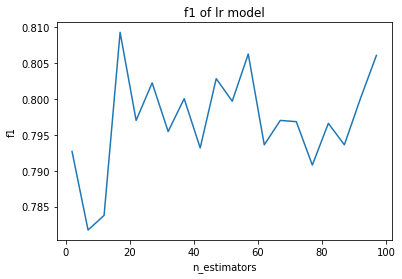

In [15]:
plt.plot(np.arange(2,100,5), bag_lr_f1)
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.title('f1 of lr model')
plt.show()

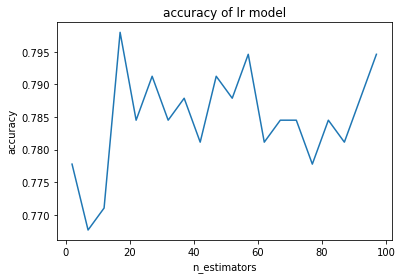

In [16]:
plt.plot(np.arange(2,100,5), bag_lr_acc)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('accuracy of lr model')
plt.show()

As you see on the plot bagging is not good for linear regression. For our algorithms optimal is 20 n_estimators because it's the best f1 and accuracy.

In [17]:
bag_dtc_f1 = []
bag_dtc_acc = []
for n_estimators in np.arange(2,100,5):
    bag_dtc = BaggingClassifier(
        base_estimator=model_dtc, n_estimators=n_estimators, n_jobs=-1, bootstrap=True
    )
    bag_dtc = bag_dtc.fit(X_train, y_train)
    y_pred = bag_dtc.predict(X_test)
    y_pred_proba = bag_dtc.predict_proba(X_test)
    print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
    bag_dtc_f1.append(f1_score(y_test, y_pred, average="macro"))
    bag_dtc_acc.append(accuracy_score(y_test, y_pred))
print(f'mean f1: {np.mean(bag_dtc_f1)}, mean accuracy: {np.mean(bag_dtc_acc)}')

f1: 0.6291985967648137, accuracy: 0.6296296296296297
f1: 0.7191473591473042, accuracy: 0.7104377104377104
f1: 0.7645677361853832, accuracy: 0.7575757575757576
f1: 0.7644953078837826, accuracy: 0.7542087542087542
f1: 0.7695847181486661, accuracy: 0.7609427609427609
f1: 0.771654037887387, accuracy: 0.7643097643097643
f1: 0.7826477726132204, accuracy: 0.7744107744107744
f1: 0.7498670283389629, accuracy: 0.7407407407407407
f1: 0.7656697522598568, accuracy: 0.7542087542087542
f1: 0.770936030451987, accuracy: 0.7643097643097643
f1: 0.7757478632478632, accuracy: 0.7676767676767676
f1: 0.7755680582347607, accuracy: 0.7643097643097643
f1: 0.7906704927211645, accuracy: 0.7845117845117845
f1: 0.7952106827845533, accuracy: 0.7878787878787878
f1: 0.7890005406759768, accuracy: 0.7811447811447811
f1: 0.7816443396788619, accuracy: 0.7744107744107744
f1: 0.7787318169965134, accuracy: 0.7710437710437711
f1: 0.803895176034285, accuracy: 0.7946127946127947
f1: 0.7776554150028806, accuracy: 0.7710437710437

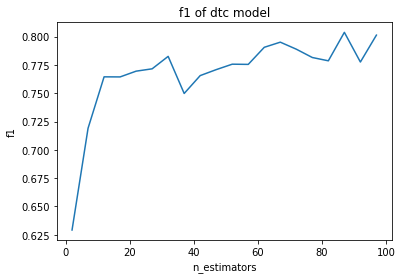

In [18]:
plt.plot(np.arange(2,100,5), bag_dtc_f1)
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.title('f1 of dtc model')
plt.show()

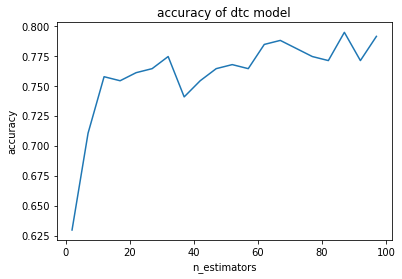

In [19]:
plt.plot(np.arange(2,100,5), bag_dtc_acc)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('accuracy of dtc model')
plt.show()

As you see on the plot bagging is good for dtc model. For our algorithms optimal is 90 n_estimators because it's the best f1 and accuracy. I think, the hyperparameters for the decision trees I found in 2.5 are optimal for trees used in ensemble.


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc_f1 = []
rfc_acc = []
for n_estimators in np.arange(2,100,5):
    rfc = RandomForestClassifier(n_estimators=n_estimators)
    rfc = rfc.fit(X_train_pca, y_train)
    y_pred = rfc.predict(X_test_pca)
    y_pred_proba = rfc.predict_proba(X_test_pca)
    print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
    rfc_f1.append(f1_score(y_test, y_pred, average="macro"))
    rfc_acc.append(accuracy_score(y_test, y_pred))
print(f'mean f1: {np.mean(rfc_f1)}, mean accuracy: {np.mean(rfc_acc)}')

f1: 0.6233177007092494, accuracy: 0.622895622895623
f1: 0.7123800841953708, accuracy: 0.7037037037037037
f1: 0.719161706415518, accuracy: 0.7104377104377104
f1: 0.7486508363635964, accuracy: 0.7407407407407407
f1: 0.7627782400510483, accuracy: 0.7542087542087542
f1: 0.7686205019428227, accuracy: 0.7609427609427609
f1: 0.7762466209198886, accuracy: 0.7676767676767676
f1: 0.7641201510322451, accuracy: 0.7542087542087542
f1: 0.7591567562362322, accuracy: 0.7474747474747475
f1: 0.7775874842690699, accuracy: 0.7710437710437711
f1: 0.7827206551452944, accuracy: 0.7744107744107744
f1: 0.7577941177550884, accuracy: 0.7474747474747475
f1: 0.76152950310559, accuracy: 0.7508417508417509
f1: 0.7715201059840517, accuracy: 0.7643097643097643
f1: 0.768144579746346, accuracy: 0.7575757575757576
f1: 0.7839437686267778, accuracy: 0.7744107744107744
f1: 0.7699502113200424, accuracy: 0.7609427609427609
f1: 0.7560376547020646, accuracy: 0.7474747474747475
f1: 0.7537749179933069, accuracy: 0.744107744107744

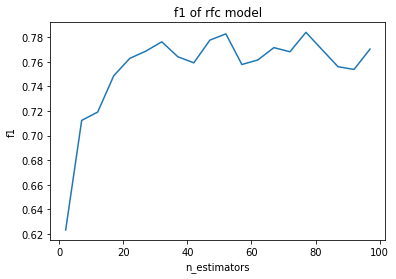

In [21]:
plt.plot(np.arange(2,100,5), rfc_f1)
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.title('f1 of rfc model')
plt.show()

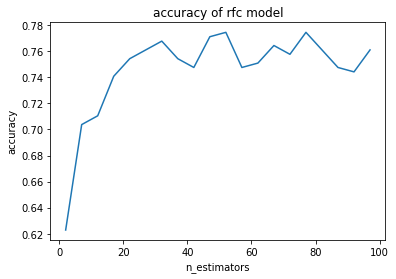

In [22]:
plt.plot(np.arange(2,100,5), rfc_acc)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('accuracy of rfc model')
plt.show()

The optimal number of trees is 80. It's different from the optimal number of logistic regressions/decision trees in 2.6 because we have some random in the algorithm of rfc.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [32]:
parts_lr_f1 = []
parts_lr_acc = []
parts = np.linspace(0, 549, 11).astype('int')[1:]
for part in parts:
    bag_lr = BaggingClassifier(
        base_estimator=model_lr, n_estimators=20, n_jobs=-1, bootstrap=True
    )
    bag_lr = bag_lr.fit(X_train[:part], y_train[:part])
    y_pred = bag_lr.predict(X_test)
    y_pred_proba = bag_lr.predict_proba(X_test)
    print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
    parts_lr_f1.append(f1_score(y_test, y_pred, average="macro"))
    parts_lr_acc.append(accuracy_score(y_test, y_pred))
print(f'mean f1: {np.mean(parts_lr_f1)}, mean accuracy: {np.mean(parts_lr_acc)}')

f1: 0.6171760024165667, accuracy: 0.6127946127946128
f1: 0.7052337613409989, accuracy: 0.7037037037037037
f1: 0.735291571239587, accuracy: 0.7306397306397306
f1: 0.7604256606191522, accuracy: 0.7508417508417509
f1: 0.7448007471980076, accuracy: 0.734006734006734
f1: 0.7423513986013986, accuracy: 0.7306397306397306
f1: 0.7922581582966247, accuracy: 0.7811447811447811
f1: 0.7736666071008025, accuracy: 0.7609427609427609
f1: 0.7953652730248475, accuracy: 0.7845117845117845
f1: 0.8122135891290575, accuracy: 0.8013468013468014
mean f1: 0.7478782768967043, mean accuracy: 0.739057239057239


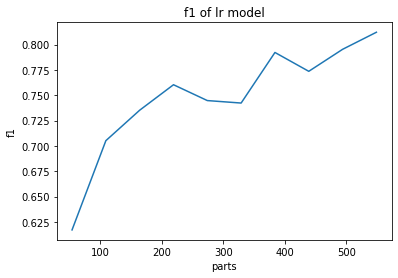

In [33]:
plt.plot(parts, parts_lr_f1)
plt.xlabel('parts')
plt.ylabel('f1')
plt.title('f1 of lr model')
plt.show()

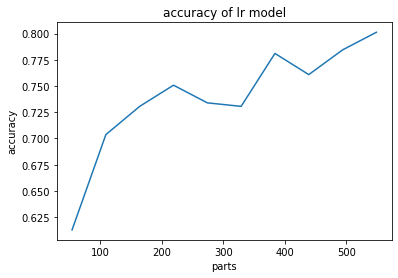

In [34]:
plt.plot(parts, parts_lr_acc)
plt.xlabel('parts')
plt.ylabel('accuracy')
plt.title('accuracy of lr model')
plt.show()

In [35]:
parts_dtc_f1 = []
parts_dtc_acc = []
for part in parts:
    bag_dtc = BaggingClassifier(
        base_estimator=model_dtc, n_estimators=90, n_jobs=-1, bootstrap=True
    )
    bag_dtc = bag_dtc.fit(X_train[:part], y_train[:part])
    y_pred = bag_dtc.predict(X_test)
    y_pred_proba = bag_dtc.predict_proba(X_test)
    print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
    parts_dtc_f1.append(f1_score(y_test, y_pred, average="macro"))
    parts_dtc_acc.append(accuracy_score(y_test, y_pred))
print(f'mean f1: {np.mean(parts_dtc_f1)}, mean accuracy: {np.mean(parts_dtc_acc)}')

f1: 0.6477555631989718, accuracy: 0.6363636363636364
f1: 0.6616357155789215, accuracy: 0.6666666666666666
f1: 0.7091424250823036, accuracy: 0.7070707070707071
f1: 0.7239328558412899, accuracy: 0.7138047138047138
f1: 0.7244368662780081, accuracy: 0.7171717171717171
f1: 0.7326230424252007, accuracy: 0.7272727272727273
f1: 0.7423737695286852, accuracy: 0.7373737373737373
f1: 0.7412481275233356, accuracy: 0.734006734006734
f1: 0.789918927579367, accuracy: 0.7811447811447811
f1: 0.7757524863284908, accuracy: 0.7676767676767676
mean f1: 0.7248819779364575, mean accuracy: 0.7188552188552189


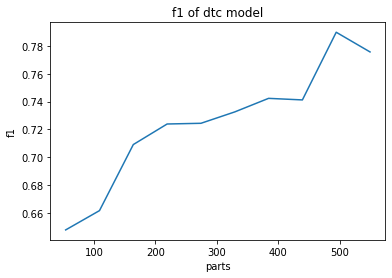

In [36]:
plt.plot(parts, parts_dtc_f1)
plt.xlabel('parts')
plt.ylabel('f1')
plt.title('f1 of dtc model')
plt.show()

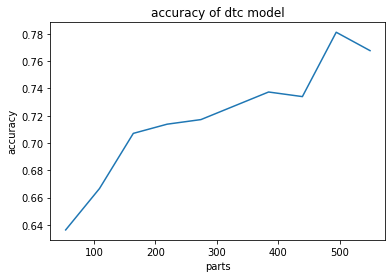

In [37]:
plt.plot(parts, parts_dtc_acc)
plt.xlabel('parts')
plt.ylabel('accuracy')
plt.title('accuracy of dtc model')
plt.show()

In [38]:
parts_rfc_f1 = []
parts_rfc_acc = []
for part in parts:
    rfc = RandomForestClassifier(n_estimators=80)
    rfc = rfc.fit(X_train_pca[:part], y_train[:part])
    y_pred = rfc.predict(X_test_pca)
    y_pred_proba = rfc.predict_proba(X_test_pca)
    print(f'f1: {f1_score(y_test, y_pred, average="macro")}, accuracy: {accuracy_score(y_test, y_pred)}')
    parts_rfc_f1.append(f1_score(y_test, y_pred, average="macro"))
    parts_rfc_acc.append(accuracy_score(y_test, y_pred))
print(f'mean f1: {np.mean(parts_rfc_f1)}, mean accuracy: {np.mean(parts_rfc_acc)}')

f1: 0.5938987470984702, accuracy: 0.5892255892255892
f1: 0.6728407706865959, accuracy: 0.6767676767676768
f1: 0.732504564578868, accuracy: 0.7272727272727273
f1: 0.7428722558654335, accuracy: 0.734006734006734
f1: 0.7217499888020119, accuracy: 0.7138047138047138
f1: 0.7285957255064807, accuracy: 0.7239057239057239
f1: 0.7350522975005731, accuracy: 0.7306397306397306
f1: 0.7429386130343776, accuracy: 0.7373737373737373
f1: 0.7363117110084546, accuracy: 0.7239057239057239
f1: 0.774617611435471, accuracy: 0.7643097643097643
mean f1: 0.7181382285516738, mean accuracy: 0.7121212121212122


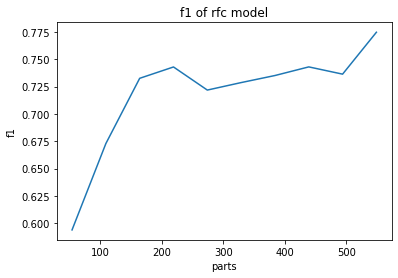

In [39]:
plt.plot(parts, parts_rfc_f1)
plt.xlabel('parts')
plt.ylabel('f1')
plt.title('f1 of rfc model')
plt.show()

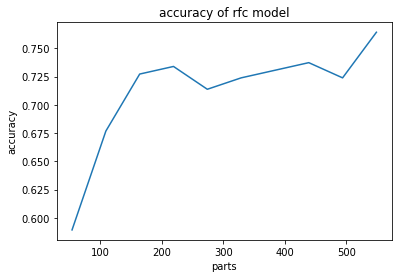

In [40]:
plt.plot(parts, parts_rfc_acc)
plt.xlabel('parts')
plt.ylabel('accuracy')
plt.title('accuracy of rfc model')
plt.show()

All of our models make better predictions when they have many samples for training. That's why the more data the best model.